<a href="https://colab.research.google.com/github/nngsam/Deep-Learning-/blob/main/W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Câu 1:
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)
Hiện tượng gì đang xảy ra?





In [ ]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [ ]:
# Tạo dữ liệu ban đầu
np.random.seed(42)
X_initial = np.sort(5 * np.random.rand(10))
y_initial = X_initial**2 + 0.1 * np.random.randn(10)

In [ ]:
# Fit hàm đa thức bậc 9 cho dữ liệu ban đầu
poly = PolynomialFeatures(degree=9)
X_poly_initial = poly.fit_transform(X_initial[:, np.newaxis])
model = LinearRegression()
model.fit(X_poly_initial, y_initial)

LinearRegression()

In [ ]:
# Dự đoán với dữ liệu ban đầu
y_pred_initial = model.predict(X_poly_initial)
mse_initial = mean_squared_error(y_initial, y_pred_initial)


In [ ]:
mse_initial

1.8097734638422657e-13

In [ ]:
# Tạo dữ liệu thêm
X_additional = np.sort(5 * np.random.rand(100))
y_additional = X_additional**2 + 0.1 * np.random.randn(100)

In [ ]:
# Fit hàm đa thức bậc 9 cho dữ liệu thêm
X_poly_additional = poly.transform(X_additional[:, np.newaxis])
y_pred_additional = model.predict(X_poly_additional)
mse_additional = mean_squared_error(y_additional, y_pred_additional)

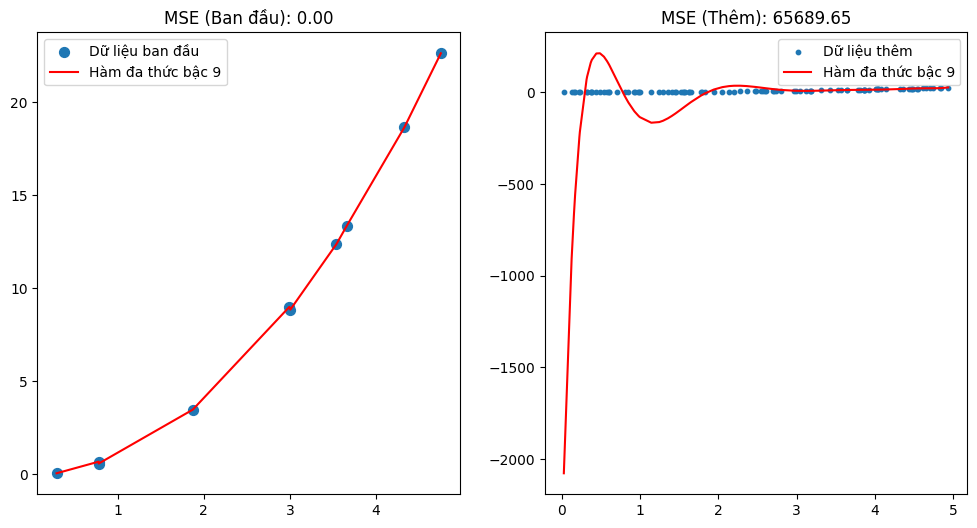

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_initial, y_initial, s=50, label='Dữ liệu ban đầu')
plt.plot(X_initial, y_pred_initial, color='r', label='Hàm đa thức bậc 9')
plt.title(f'MSE (Ban đầu): {mse_initial:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_additional, y_additional, s=10, label='Dữ liệu thêm')
plt.plot(X_additional, y_pred_additional, color='r', label='Hàm đa thức bậc 9')
plt.title(f'MSE (Thêm): {mse_additional:.2f}')
plt.legend()

plt.show()

The phenomenon occurring here is overfitting.

When you fit a 9th-degree polynomial to the initial 10 data points, the model perfectly fits the noise in the data, resulting in a very low MSE.

However, when you add 100 more data points, the polynomial becomes overly complex and does not generalize well to the new data. As a result, the MSE for the combined dataset increases significantly, indicating that the model is fitting noise and performing poorly on unseen data.

This is a classic example of overfitting, where a complex model fits the training data too closely but fails to generalize to new data.

### **Câu 2: Code from scratch**
Implement hàm tính convolution
*  Input: X, W, stride, padding
*  Output: Y


Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

In [ ]:
import numpy as np

def convolution(X, W, stride, padding):
    # Get the dimensions of the input and kernel
    input_height, input_width = X.shape
    kernel_height, kernel_width = W.shape

    # Calculate the dimensions of the output
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1

    # Initialize the output matrix
    Y = np.zeros((output_height, output_width))

    # convolution
    for i in range(0, input_height - kernel_height + 1, stride):
        for j in range(0, input_width - kernel_width + 1, stride):
            # Extract the corresponding slice from the input
            input_slice = X[i:i+kernel_height, j:j+kernel_width]

            # Compute the convolution and add it to the output matrix
            Y[i//stride, j//stride] = np.sum(input_slice * W)

    return Y

# Test convolution
X = np.array([[1, 2, 1, 2],
              [2, 3, 2, 3],
              [1, 2, 1, 2],
              [2, 3, 2, 3]])

W = np.array([[1, 0],
              [0, -1]])

stride = 1
padding = 0

result = convolution(X, W, stride, padding)
print(result)


[[-2.  0. -2.]
 [ 0.  2.  0.]
 [-2.  0. -2.]]


In [ ]:
import torch
import torch.nn.functional as F

# Define input tensor and kernel tensor
X = torch.tensor([[1, 2, 1, 2],
                  [2, 3, 2, 3],
                  [1, 2, 1, 2],
                  [2, 3, 2, 3]], dtype=torch.float32)

X = X.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
W = torch.tensor([[1, 0],
                  [0, -1]], dtype=torch.float32)
W = W.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Perform convolution using PyTorch
stride = 1
padding = 0
result = F.conv2d(X, W, stride=stride, padding=padding)

print(result)


tensor([[[[-2.,  0., -2.],
          [ 0.,  2.,  0.],
          [-2.,  0., -2.]]]])


### **Câu 3**:
Cho dataset CIFAR-10

*  Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch

*   Chỉnh learning rate, vẽ đồ thị loss tương ứng.

*    Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

In [ ]:
import torch.nn as nn

import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(
            nn.Linear(512, 4096),  # Adjusted input size for the fully connected layer
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc1 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc2 = nn.Linear(4096, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
# Define transformations for CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Initialize the model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VGG16().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)



In [30]:

# Training loop
num_epochs = 10
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Chuyển đổi sang kiểu dữ liệu trên GPU

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
    loss_values.append(running_loss / len(trainloader))




Epoch 1, Loss: 1.3354895802410058
Epoch 2, Loss: 0.8075090309847957
Epoch 3, Loss: 0.6006912940450947
Epoch 4, Loss: 0.46984131767621734
Epoch 5, Loss: 0.37763052466123
Epoch 6, Loss: 0.2936930935972792
Epoch 7, Loss: 0.23769211593796225
Epoch 8, Loss: 0.180907102840026
Epoch 9, Loss: 0.15067757867143283
Epoch 10, Loss: 0.12072511144515956


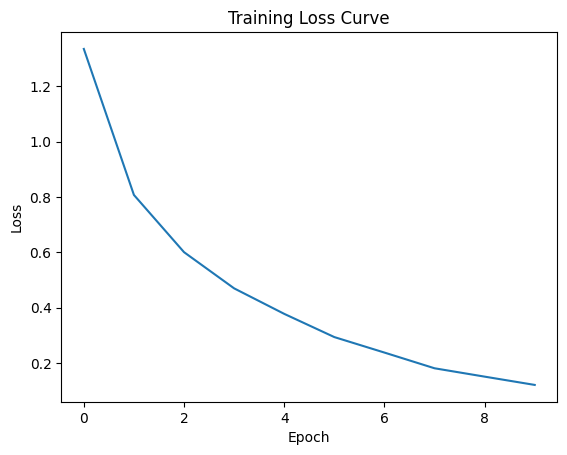

In [31]:
# Plot the loss curve
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()



In [33]:
# Model evaluation on the test set
model.eval()
predictions = []
ground_truth = []
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Chuyển đổi sang kiểu dữ liệu trên GPU
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        ground_truth.extend(labels.cpu().numpy())

accuracy = accuracy_score(ground_truth, predictions)
recall = recall_score(ground_truth, predictions, average='weighted')
f1 = f1_score(ground_truth, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8294
Recall: 0.8294
F1-Score: 0.8299020059977531


### **Câu 4**
Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

- Khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng là do các layer phía sau học được các đặc điểm chi tiết hơn về input image.

- Các layer phía trước của CNN model thường có width và height lớn để có thể học được các đặc điểm tổng quát của input image. Ví dụ, các layer đầu tiên của CNN model có thể học được các đặc điểm như cạnh, góc, đường viền,...

- Các layer phía sau của CNN model thường có width và height nhỏ hơn để có thể học được các đặc điểm chi tiết hơn. Ví dụ, các layer phía sau của CNN model có thể học được các đặc điểm như màu sắc, hình dạng,...

Ngoài ra, việc giảm width và height cũng giúp giảm số lượng parameter của model, từ đó giúp cải thiện hiệu suất của model.

- depth của feature map sẽ tăng để bù đắp cho việc giảm width và height. Điều này là do các kernel lớn hơn sẽ cần nhiều tham số hơn để mô tả các đặc điểm phức tạp hơn.


### **Câu 5 (Optional)**
1 bài viết hay bao gồm tool sử dụng để vísualize CNN model



https://paperswithcode.com/paper/cnn-explainer-learning-convolutional-neural

some of the key features of CNN Explainer:

- Interactive visualizations of the different components of a CNN model
- Educational features to help users understand the different concepts in CNNs
- Easy to use and does not require any prior knowledge of CNNs

CNN Explainer provides a variety of interactive visualizations, including:

- Filter activations: Visualizations of the filter activations show how the CNN model is responding to different parts of the input image.
- Feature maps: Visualizations of the feature maps show the different features that the CNN model has learned from the input image.
- Class activation maps: Visualizations of the class activation maps show how the CNN model is using different parts of the input image to make predictions.
- Attention maps: Visualizations of the attention maps show which parts of the input image the CNN model is focusing on when making predictions.